# Loading Dataset

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    directory=r"/kaggle/input/brain-tumor-mri-dataset/Training",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training' # Use only the training images
)

validation_generator = datagen.flow_from_directory(
    directory=r"/kaggle/input/brain-tumor-mri-dataset/Training",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation' # Use only the validation images
)

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.


In [3]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [4]:
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Model, Sequential

In [5]:
import tensorflow as tf

In [6]:
IMAGE_SIZE = [224, 224]
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)
prediction = Dense(4, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

58889256/58889256 [==============================] - 0s 0us/step


In [7]:
history=model.fit(
    train_generator,
     batch_size=16,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/20
143/143 [==============================] - 80s 439ms/step - loss: 0.4159 - accuracy: 0.8473 - val_loss: 0.5723 - val_accuracy: 0.8256
Epoch 2/20
143/143 [==============================] - 31s 219ms/step - loss: 0.1816 - accuracy: 0.9346 - val_loss: 0.7412 - val_accuracy: 0.7870
Epoch 3/20
143/143 [==============================] - 31s 215ms/step - loss: 0.1055 - accuracy: 0.9632 - val_loss: 0.6027 - val_accuracy: 0.8282
Epoch 4/20
143/143 [==============================] - 33s 233ms/step - loss: 0.0902 - accuracy: 0.9670 - val_loss: 0.5203 - val_accuracy: 0.8352
Epoch 5/20
143/143 [==============================] - 31s 218ms/step - loss: 0.0496 - accuracy: 0.9860 - val_loss: 0.5373 - val_accuracy: 0.8545
Epoch 6/20
143/143 [==============================] - 30s 209ms/step - loss: 0.0337 - accuracy: 0.9937 - val_loss: 0.6003 - val_accuracy: 0.8440
Epoch 7/20
143/143 [==============================] - 31s 213ms/step - loss: 0.0251 - accuracy: 0.9967 - val_loss: 0.6511 - val_ac

Training Accuracy :  0.9842266499996185
Validation Accuracy :  0.8454864144325256


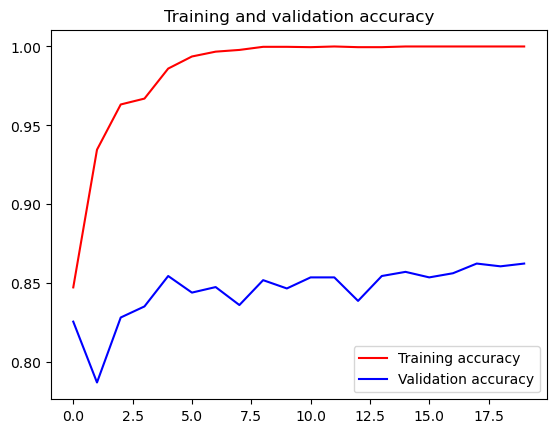

<Figure size 640x480 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
from statistics import mean
acc = history.history['accuracy']
print("Training Accuracy : ",mean(acc))
val_acc = history.history['val_accuracy']
print("Validation Accuracy : ",mean(val_acc))
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

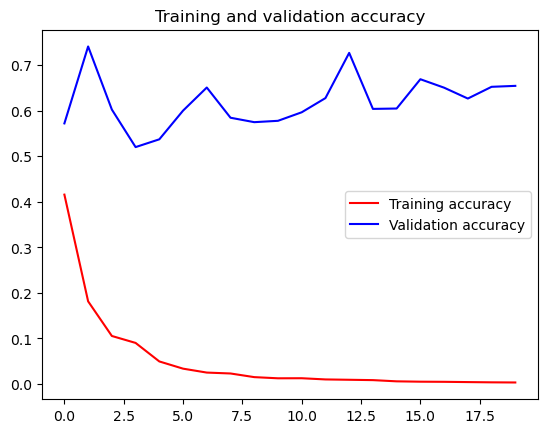

<Figure size 640x480 with 0 Axes>

In [9]:
plt.plot(epochs, loss, 'r', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()